<a href="https://colab.research.google.com/github/rejina0914/Worksheet/blob/main/Workhop7_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

3 Part 1: Regression Task (California Housing)
3.1 Task 1: Load and Split Dataset
• Use the California Housing dataset from sklearn.datasets.
• Split the dataset into **training (80%)** and **test (20%)** sets.


In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the datasets from local CSV files
train_df = pd.read_csv('/content/sample_data/california_housing_train.csv')
X = train_df.drop('median_house_value', axis=1)
y = train_df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Task 2: Complete all the Task
• Regression Task (California Housing):
– Step 1: Baseline Model (No Regularization) Build a Linear Regression model without
any regularization.
∗ Train the model on the training set.
∗ Observe the coefficients of the model.
∗ Compute the Mean Squared Error (MSE) on both training and test sets.
∗ This step helps to understand how a simple linear model behaves on the dataset and serves as
a baseline for comparison.

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#Baseline Model (No Regularization)
LR=LinearRegression()

#Train the model on the training set
LR.fit(X_train,y_train)

#Observe the coefficients of the model
coeff_df = pd.DataFrame({'Feature': X.columns,'Coefficient': LR.coef_})
print(coeff_df)

#Compute the Mean Squared Error (MSE) on both training and test sets.
y_test_pred=LR.predict(X_test)
y_train_pred=LR.predict(X_train)

test_MSE=mean_squared_error(y_test,y_test_pred)
train_MSE=mean_squared_error(y_train,y_train_pred)
print("Testing MSE:",test_MSE)
print("Training MSE:",train_MSE)

              Feature   Coefficient
0           longitude -43465.247687
1            latitude -43106.304441
2  housing_median_age   1131.724382
3         total_rooms     -8.843261
4      total_bedrooms    113.707973
5          population    -35.657077
6          households     45.147555
7       median_income  40194.726347
Testing MSE: 4634658406.223264
Training MSE: 4875656612.327821


Step 2: Hyperparameter Tuning Use GridSearchCV or RandomizedSearchCV to tune hyperparameters for Ridge and Lasso regression models.

∗ Define a grid of alpha values (regularization strength). ∗ Run cross-validation on the training set to find the optimal alpha. ∗ Evaluate the model performance on the test set using MSE. ∗ This step demonstrates the importance of selecting appropriate hyperparameters to improve generalization.

In [27]:
#GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

#Hyperparameter
alphas={'alpha':[0.001, 0.01, 0.1, 1, 10]}

#Ridge
ridge=Ridge()
ridge_cv=GridSearchCV(ridge,alphas,scoring='neg_mean_squared_error',cv=5)
ridge_cv.fit(X_train,y_train)
y_pred=ridge_cv.predict(X_test)
print("Ridge MSE:",mean_squared_error(y_test,y_pred))

#Lasso
lasso=Lasso()
lasso_cv=GridSearchCV(lasso,alphas,scoring='neg_mean_squared_error',cv=5)
lasso_cv.fit(X_train,y_train)
y_pred=lasso_cv.predict(X_test)
print("Lasso MSE:",mean_squared_error(y_test,y_pred))

Ridge MSE: 4634597634.731547
Lasso MSE: 4634642272.384492


In [28]:
#RandomSearchCV
import numpy as np
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameter
alphas = {'alpha': np.logspace(-3, 2, 100)}

# Ridge
ridge = Ridge()
ridge_cv=RandomizedSearchCV(ridge, alphas, n_iter=10, cv=5)
ridge_cv.fit(X_train, y_train)
y_pred = ridge_cv.predict(X_test)
print("Best Ridge alpha:", mean_squared_error(y_test, y_pred))

# Lasso
lasso = Lasso(max_iter=5000)
lasso_cv=RandomizedSearchCV(lasso, alphas, n_iter=10, cv=5)
lasso_cv.fit(X_train, y_train)
y_pred = lasso_cv.predict(X_test)
print("Best Lasso alpha:",  mean_squared_error(y_test, y_pred))


Best Ridge alpha: 4634645523.847012
Best Lasso alpha: 4634636449.789945


Step 3: Regularization Experiments (L1 vs L2) Train L1 (Lasso) and L2 (Ridge) regression models using the optimal hyperparameters.
∗ Compare the coefficients learned by both models. Notice that L1 tends to produce sparse coefficients (some set to zero), while L2 shrinks coefficients without zeroing them. ∗ Evaluate and compare the MSE on training and test sets. ∗ Discuss the effect of regularization on the bias-variance tradeoff: · How L1/L2 reduces variance and prevents overfitting. · How excessive regularization may increase bias and underfit the data. ∗ Visualize the effect by plotting coefficients or training/test error versus alpha values (optional but recommended).

Ridge MSE (Train): 4875656685.652387
Ridge MSE (Test): 4634651616.323527
Lasso MSE (Train): 4875656612.3987255
Lasso MSE (Test): 4634658237.695992
Ridge coefficients: [-4.34529842e+04 -4.30948379e+04  1.13192007e+03 -8.84450137e+00
  1.13691289e+02 -3.56573993e+01  4.51757472e+01  4.01954628e+04]
Lasso coefficients: [-4.34648686e+04 -4.31059500e+04  1.13172970e+03 -8.84329454e+00
  1.13707419e+02 -3.56570885e+01  4.51484419e+01  4.01947451e+04]


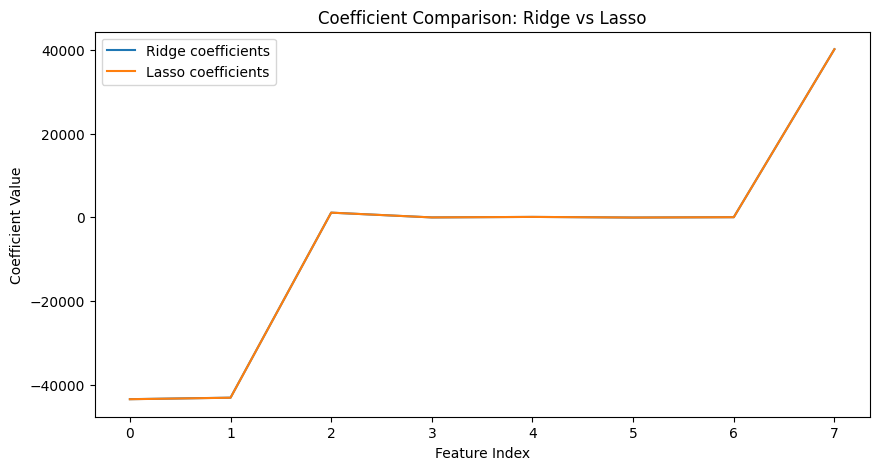

In [29]:
import matplotlib.pyplot as plt
best_alpha_ridge=1.0
best_alpha_lasso=0.1

ridge = Ridge(alpha=best_alpha_ridge)
ridge.fit(X_train, y_train)
y_train_pred_ridge = ridge.predict(X_train)
y_test_pred_ridge = ridge.predict(X_test)

lasso = Lasso(alpha=best_alpha_lasso)
lasso.fit(X_train, y_train)
y_train_pred_lasso = lasso.predict(X_train)
y_test_pred_lasso = lasso.predict(X_test)

mse_train_ridge = mean_squared_error(y_train, y_train_pred_ridge)
mse_test_ridge = mean_squared_error(y_test, y_test_pred_ridge)

mse_train_lasso = mean_squared_error(y_train, y_train_pred_lasso)
mse_test_lasso = mean_squared_error(y_test, y_test_pred_lasso)

print("Ridge MSE (Train):", mse_train_ridge)
print("Ridge MSE (Test):", mse_test_ridge)
print("Lasso MSE (Train):", mse_train_lasso)
print("Lasso MSE (Test):", mse_test_lasso)

print("Ridge coefficients:", ridge.coef_)
print("Lasso coefficients:", lasso.coef_)

plt.figure(figsize=(10,5))
plt.plot(ridge.coef_, label='Ridge coefficients')
plt.plot(lasso.coef_, label='Lasso coefficients')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.title('Coefficient Comparison: Ridge vs Lasso')
plt.legend()
plt.show()



Part 2: Classification Task (Breast Cancer)
4.1 Task 1: Load and Split Dataset • Use the Breast Cancer dataset from sklearn.datasets. • Treat it as a binary classification task. • Split into training (80%) and test (20%) sets.

In [30]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

4.2 Task 2: Complete all the Task

• Classification Task (Diabetes):–

 Step 1: Baseline Model (No Regularization) Build a Logistic Regression model without specifying any regularization (default settings). ∗ Train the model on the training set. ∗ Observe the coefficients of the model. ∗ Compute the accuracy on both training and test sets. ∗ This step serves as a baseline for comparison and helps to understand the behavior of a standard logistic regression model on the dataset.

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

# Baseline Logistic Regression
baseline_model = LogisticRegression(max_iter=10000, solver='lbfgs')
baseline_model.fit(X_train, y_train)

# Coefficients
print("Coefficients:", baseline_model.coef_)

# Accuracy
y_train_pred = baseline_model.predict(X_train)
y_test_pred = baseline_model.predict(X_test)
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))


Coefficients: [[ 1.0274368   0.22145051 -0.36213488  0.0254667  -0.15623532 -0.23771256
  -0.53255786 -0.28369224 -0.22668189 -0.03649446 -0.09710208  1.3705667
  -0.18140942 -0.08719575 -0.02245523  0.04736092 -0.04294784 -0.03240188
  -0.03473732  0.01160522  0.11165329 -0.50887722 -0.01555395 -0.016857
  -0.30773117 -0.77270908 -1.42859535 -0.51092923 -0.74689363 -0.10094404]]
Training Accuracy: 0.9582417582417583
Test Accuracy: 0.956140350877193


Step 2:

Hyperparameter Tuning Use GridSearchCV or RandomizedSearchCV to tune hyperparameters for logistic regression models with regularization.
∗ Focus on tuning the C parameter (inverse of regularization strength) and the penalty type (l1 or l2). ∗ Run cross-validation on the training set to identify the optimal hyperparameters. ∗ Evaluate the model performance on the test set using accuracy.

∗ This step demonstrates the importance of hyperparameter selection for improving model generalization.

In [32]:
#GridSearchCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


grid = GridSearchCV(
    LogisticRegression(max_iter=10000,solver='saga'),
    {'C': [0.001, 0.01, 0.1, 1, 10, 100]},cv=5,scoring='accuracy'
)

# Fit
grid.fit(X_train_scaled, y_train)

print("Best C:", grid.best_params_['C'])
print("Test Accuracy:", grid.score(X_test_scaled, y_test))


Best C: 1
Test Accuracy: 0.9736842105263158


In [33]:
# RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

random_cv = RandomizedSearchCV(
    LogisticRegression(max_iter=10000,solver='saga'),
    {'C': [0.001, 0.01, 0.1, 1, 10, 100]},n_iter=4,cv=5,scoring='accuracy'
)

random_cv.fit(X_train_scaled, y_train)

print("Best C:", random_cv.best_params_['C'])
print("Test Accuracy:", random_cv.score(X_test_scaled, y_test))


Best C: 10
Test Accuracy: 0.9736842105263158


Step 3:
Regularization Experiments (L1 vs L2) Train separate logistic regression models using L1 (Lasso-like) and L2 (Ridge-like) regularization with the optimal hyperparameters.
∗ Compare the coefficients for L1 and L2. Observe that L1 tends to produce sparse coefficients (some exactly zero), whereas L2 shrinks all coefficients but rarely sets them exactly to zero. ∗ Evaluate and compare accuracy on training and test sets. ∗ Discuss the effect of regularization on the bias-variance tradeoff: · How L1/L2 reduces variance and mitigates overfitting. · How overly strong regularization may increase bias, reducing accuracy. ∗ Optional: Visualize the coefficients or plot accuracy vs C values to better understand the impact of L1 and L2 regularization.

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# L1 Regularization (Lasso-like)
l1_model = LogisticRegression(penalty='l1', solver='liblinear', C=1, max_iter=1000)
l1_model.fit(X_train, y_train)

# L2 Regularization (Ridge-like)
l2_model = LogisticRegression(penalty='l2', solver='liblinear', C=1, max_iter=1000)
l2_model.fit(X_train, y_train)
print("L1 Coefficients:")
print(l1_model.coef_)

print("L2 Coefficients:")
print(l2_model.coef_)
print("\n")
print("L1 Train Accuracy:", accuracy_score(y_train, l1_model.predict(X_train)))
print("L1 Test Accuracy:", accuracy_score(y_test, l1_model.predict(X_test)))

print("L2 Train Accuracy:", accuracy_score(y_train, l2_model.predict(X_train)))
print("L2 Test Accuracy:", accuracy_score(y_test, l2_model.predict(X_test)))


L1 Coefficients:
[[ 4.47199962  0.14068333 -0.29004672 -0.0168225   0.          0.
   0.          0.          0.          0.          0.          1.71870606
   0.         -0.09962861  0.          0.          0.          0.
   0.          0.          0.         -0.42874463 -0.02641129 -0.01484281
   0.          0.         -3.54001082  0.          0.          0.        ]]
L2 Coefficients:
[[ 2.13248406e+00  1.52771940e-01 -1.45091255e-01 -8.28669349e-04
  -1.42636015e-01 -4.15568847e-01 -6.51940282e-01 -3.44456106e-01
  -2.07613380e-01 -2.97739324e-02 -5.00338038e-02  1.44298427e+00
  -3.03857384e-01 -7.25692126e-02 -1.61591524e-02 -1.90655332e-03
  -4.48855442e-02 -3.77188737e-02 -4.17516190e-02  5.61347410e-03
   1.23214996e+00 -4.04581097e-01 -3.62091502e-02 -2.70867580e-02
  -2.62630530e-01 -1.20898539e+00 -1.61796947e+00 -6.15250835e-01
  -7.42763610e-01 -1.16960181e-01]]


L1 Train Accuracy: 0.9604395604395605
L1 Test Accuracy: 0.956140350877193
L2 Train Accuracy: 0.958241758241758

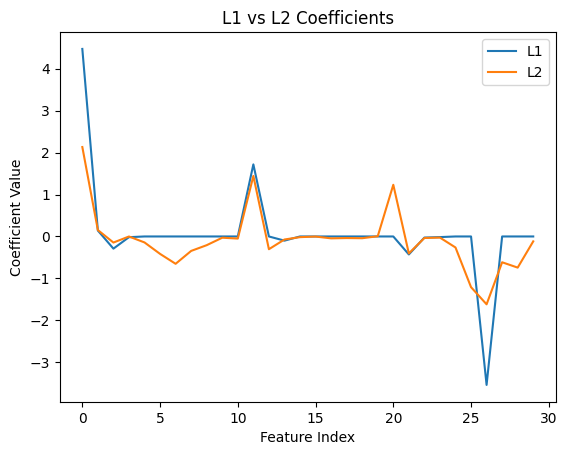

In [35]:
import matplotlib.pyplot as plt

plt.plot(l1_model.coef_[0], label='L1')
plt.plot(l2_model.coef_[0], label='L2')
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.title("L1 vs L2 Coefficients")
plt.legend()
plt.show()
